# Pregunta 3:
## ¿Qué dimensión del capital familiar: cultural (educación de los padres) o económico (estrato y bienes del hogar) tiene mayor poder explicativo sobre el desempeño en el Saber 11, y cómo cambia esa relación entre áreas evaluadas (Matemáticas, Lectura Crítica e Inglés)?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Leer datos
df = pd.read_csv("df_limpio.csv")

# Ver primeras filas
df.head()


,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_PAIS_RESIDE,FAMI_CUARTOSHOGAR,...,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,FAMI_EDU_PADRES_SUM,PERSONAS_POR_CUARTO
0,20224,URBANO,N,MIXTO,UNICA,GRANADA,03/09/2004,F,COLOMBIA,NaN,...,No,A-,42.0,26.0,45.0,42.0,43.0,196.0,2,NaN
1,20224,URBANO,N,MIXTO,SABATINA,CHOACHÍ,10/02/2005,M,COLOMBIA,NaN,...,Si,A-,40.0,60.0,46.0,54.0,50.0,258.0,7,NaN
2,20224,URBANO,NaN,MIXTO,COMPLETA,SOACHA,27/12/2004,M,COLOMBIA,NaN,...,NaN,A1,54.0,61.0,58.0,55.0,55.0,285.0,12,NaN
3,20224,URBANO,N,MIXTO,COMPLETA,SOACHA,25/06/2006,F,COLOMBIA,NaN,...,Si,A2,62.0,54.0,64.0,63.0,60.0,302.0,10,NaN
4,20224,RURAL,N,MIXTO,SABATINA,SASAIMA,18/05/2006,M,COLOMBIA,NaN,...,Si,A1,54.0,45.0,46.0,48.0,52.0,241.0,7,NaN


In [29]:
#Información Clave de los datos
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 470818 entries, 0 to 470817
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PERIODO                   470818 non-null  int64  
 1   COLE_AREA_UBICACION       470620 non-null  str    
 2   COLE_BILINGUE             393463 non-null  str    
 3   COLE_GENERO               470818 non-null  str    
 4   COLE_JORNADA              470818 non-null  str    
 5   COLE_MCPIO_UBICACION      470818 non-null  str    
 6   ESTU_FECHANACIMIENTO      470818 non-null  str    
 7   ESTU_GENERO               470553 non-null  str    
 8   ESTU_PAIS_RESIDE          470818 non-null  str    
 9   FAMI_CUARTOSHOGAR         0 non-null       float64
 10  FAMI_EDUCACIONMADRE       470818 non-null  int64  
 11  FAMI_EDUCACIONPADRE       470818 non-null  int64  
 12  FAMI_ESTRATOVIVIENDA      459209 non-null  float64
 13  FAMI_PERSONASHOGAR        0 non-null       float64
 14 

In [30]:
#valores faltantes en todas las columnas
df.isna().sum()

PERIODO                          0
COLE_AREA_UBICACION            198
COLE_BILINGUE                77355
COLE_GENERO                      0
COLE_JORNADA                     0
COLE_MCPIO_UBICACION             0
ESTU_FECHANACIMIENTO             0
ESTU_GENERO                    265
ESTU_PAIS_RESIDE                 0
FAMI_CUARTOSHOGAR           470818
FAMI_EDUCACIONMADRE              0
FAMI_EDUCACIONPADRE              0
FAMI_ESTRATOVIVIENDA         11609
FAMI_PERSONASHOGAR          470818
FAMI_TIENEAUTOMOVIL           6736
FAMI_TIENECOMPUTADOR          7473
FAMI_TIENEINTERNET            9766
FAMI_TIENELAVADORA            6420
DESEMP_INGLES                   71
PUNT_INGLES                     28
PUNT_MATEMATICAS                 0
PUNT_SOCIALES_CIUDADANAS    171841
PUNT_C_NATURALES            171841
PUNT_LECTURA_CRITICA        171841
PUNT_GLOBAL                 171841
FAMI_EDU_PADRES_SUM              0
PERSONAS_POR_CUARTO         470818
dtype: int64

In [31]:
df.shape


(470818, 27)

In [32]:
cols = [
    "PUNT_GLOBAL",
    "PUNT_MATEMATICAS",
    "PUNT_LECTURA_CRITICA",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "DESEMP_INGLES",
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENELAVADORA"
]

df = df[cols].copy()
df.shape

(470818, 14)

In [33]:
df.isnull().sum().sort_values(ascending=False)


PUNT_GLOBAL                 171841
PUNT_LECTURA_CRITICA        171841
PUNT_SOCIALES_CIUDADANAS    171841
PUNT_C_NATURALES            171841
FAMI_ESTRATOVIVIENDA         11609
FAMI_TIENEINTERNET            9766
FAMI_TIENECOMPUTADOR          7473
FAMI_TIENEAUTOMOVIL           6736
FAMI_TIENELAVADORA            6420
DESEMP_INGLES                   71
PUNT_INGLES                     28
PUNT_MATEMATICAS                 0
FAMI_EDUCACIONPADRE              0
FAMI_EDUCACIONMADRE              0
dtype: int64

Hay un gran porcentaje de datos faltantes, 171,841 Lo cual es gigante, pues se podría decir el propósito del dataset es puntaje del icfes, sin emabrgo, al ver que hay en total 470mil datos, tenemos datos válidos por al menos 298k.

In [34]:
#Quitar personas que no tienen puntaje global
df = df.dropna(subset=["PUNT_GLOBAL"])

#vuelvo a revisar 
print(df.isna().sum())

#revisar cuantos estudiantes me quedaron despues de quitar el puntaje global 
df.shape


PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                   28
DESEMP_INGLES                 27
FAMI_EDUCACIONMADRE            0
FAMI_EDUCACIONPADRE            0
FAMI_ESTRATOVIVIENDA        8611
FAMI_TIENEAUTOMOVIL         4925
FAMI_TIENECOMPUTADOR        4663
FAMI_TIENEINTERNET          7935
FAMI_TIENELAVADORA          4609
dtype: int64


(298977, 14)

In [35]:
# Quitar personas que no tienen puntajes por área
df = df.dropna(subset=[
    "PUNT_MATEMATICAS",
    "PUNT_LECTURA_CRITICA",
    "PUNT_INGLES"
])

# Revisar nuevamente
print(df.isna().sum())

# Ver tamaño actual
df.shape

PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                    0
DESEMP_INGLES                  0
FAMI_EDUCACIONMADRE            0
FAMI_EDUCACIONPADRE            0
FAMI_ESTRATOVIVIENDA        8606
FAMI_TIENEAUTOMOVIL         4924
FAMI_TIENECOMPUTADOR        4662
FAMI_TIENEINTERNET          7932
FAMI_TIENELAVADORA          4606
dtype: int64


(298949, 14)

In [36]:
# Quitar personas sin estrato
df = df.dropna(subset=["FAMI_ESTRATOVIVIENDA"])

print(df.isna().sum())
df.shape

PUNT_GLOBAL                    0
PUNT_MATEMATICAS               0
PUNT_LECTURA_CRITICA           0
PUNT_C_NATURALES               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_INGLES                    0
DESEMP_INGLES                  0
FAMI_EDUCACIONMADRE            0
FAMI_EDUCACIONPADRE            0
FAMI_ESTRATOVIVIENDA           0
FAMI_TIENEAUTOMOVIL         2228
FAMI_TIENECOMPUTADOR        2025
FAMI_TIENEINTERNET           463
FAMI_TIENELAVADORA          1963
dtype: int64


(290343, 14)

In [37]:
df = df.dropna(subset=[
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENELAVADORA"
])

print(df.isna().sum())
df.shape

PUNT_GLOBAL                 0
PUNT_MATEMATICAS            0
PUNT_LECTURA_CRITICA        0
PUNT_C_NATURALES            0
PUNT_SOCIALES_CIUDADANAS    0
PUNT_INGLES                 0
DESEMP_INGLES               0
FAMI_EDUCACIONMADRE         0
FAMI_EDUCACIONPADRE         0
FAMI_ESTRATOVIVIENDA        0
FAMI_TIENEAUTOMOVIL         0
FAMI_TIENECOMPUTADOR        0
FAMI_TIENEINTERNET          0
FAMI_TIENELAVADORA          0
dtype: int64


(287474, 14)

Limpiamoz el data set, para que todos los posibles datos que necesutemos esten completos. contamos con un total de 287mil datos

No sé como tratar la dimensión la dimensión cultural, si po rsperado, crear un indice conjunto, o tomar solo el de la madre, al ser probablemente más relevante

In [39]:
df["FAMI_EDUCACIONMADRE"].value_counts().sort_index()

FAMI_EDUCACIONMADRE
0      5343
1      3631
2     37847
3     39098
4     43237
5     78027
6      8306
7     25249
8      7023
9     31602
10     8111
Name: count, dtype: int64

In [ ]:
df["FAMI_EDUCACIONMADRE"].value_counts().sort_index()

In [38]:
df[["FAMI_EDUCACIONMADRE", 
    "FAMI_EDUCACIONPADRE"]].corr()

,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE
FAMI_EDUCACIONMADRE,1.000000,0.585305
FAMI_EDUCACIONPADRE,0.585305,1.000000


In [ ]:
#Distribucipon conjunta me permite ver en una matriz como encajan los datos en relación con los otros
pd.crosstab(
    df["FAMI_EDUCACIONMADRE"], 
    df["FAMI_EDUCACIONPADRE"]
)

FAMI_EDUCACIONPADRE,0,1,2,3,4,5,6,7,8,9,10
FAMI_EDUCACIONMADRE,,,,,,,,,,,
0,3160,53,328,228,331,529,62,192,85,315,60
1,136,1822,830,343,186,217,22,31,5,33,6
2,1631,1988,21654,5672,3419,2706,200,264,70,216,27
3,1601,1296,9163,17304,4290,4387,203,450,110,269,25
4,2267,1118,8291,6641,14037,7967,563,1158,340,791,64
5,4287,1357,8178,8883,11311,33613,1598,4045,976,3445,334
6,490,119,495,513,1163,2328,1322,950,243,592,91
7,1793,263,1203,1293,2696,6676,948,5990,858,3100,429
8,529,69,208,243,572,1405,288,686,1186,1554,283


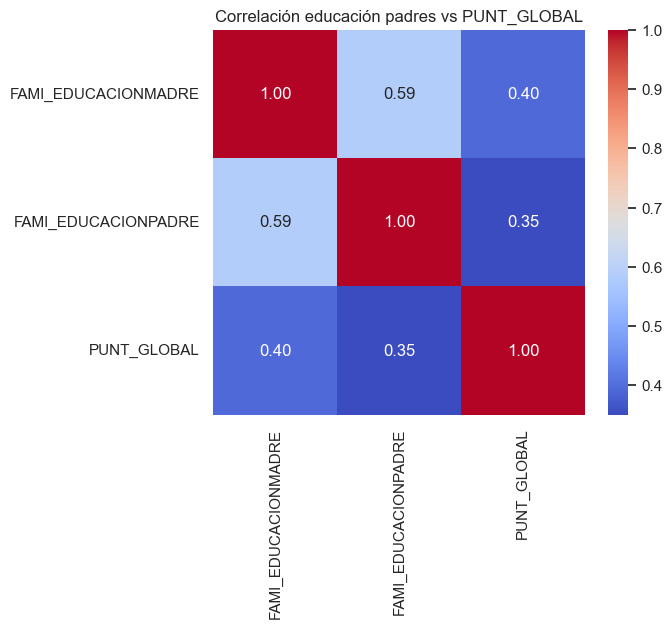

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[[
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "PUNT_GLOBAL"
]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación educación padres vs PUNT_GLOBAL")
plt.show()

Dado que la educación materna y paterna presentan una correlación moderada (ρ = 0.59), pero no lo suficientemente alta como para considerarlas redundantes, se construyó un indicador agregado de capital cultural del hogar utilizando el máximo nivel educativo alcanzado por alguno de los padres.

In [42]:
# Crear capital cultural del hogar como máximo nivel educativo
df["EDU_MAX_HOGAR"] = df[
    ["FAMI_EDUCACIONMADRE", "FAMI_EDUCACIONPADRE"]
].max(axis=1)

# Verificación rápida
df[["FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "EDU_MAX_HOGAR"]].head()

,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,EDU_MAX_HOGAR
0,1,1,1
1,4,3,4
3,5,5,5
4,7,0,7
5,2,6,6


In [43]:
df["EDU_MAX_HOGAR"].describe()

count    287474.000000
mean          5.315256
std           2.374553
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: EDU_MAX_HOGAR, dtype: float64

In [44]:
df

,PUNT_GLOBAL,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,DESEMP_INGLES,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,EDU_MAX_HOGAR
0,196.0,26.0,43.0,42.0,45.0,42.0,A-,1,1,1.0,No,NO,NO,No,1
1,258.0,60.0,50.0,54.0,46.0,40.0,A-,4,3,1.0,No,SI,SI,Si,4
3,302.0,54.0,60.0,63.0,64.0,62.0,A2,5,5,2.0,No,SI,SI,Si,5
4,241.0,45.0,52.0,48.0,46.0,54.0,A1,7,0,2.0,No,NO,SI,Si,7
5,200.0,44.0,48.0,31.0,36.0,44.0,A-,2,6,2.0,No,SI,SI,No,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470812,218.0,42.0,47.0,45.0,41.0,41.0,A-,2,2,1.0,No,SI,NO,Si,2
470813,325.0,77.0,58.0,61.0,66.0,59.0,A2,2,2,1.0,No,NO,NO,No,2
470814,191.0,36.0,40.0,42.0,33.0,43.0,A-,9,4,2.0,No,SI,NO,Si,9
470815,220.0,50.0,57.0,35.0,37.0,34.0,A-,4,2,2.0,Si,SI,NO,Si,4


In [45]:
# Eliminar columnas originales de educación
df = df.drop(columns=[
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE"
])

# Verificar que quedó correcto
df.columns

Index(['PUNT_GLOBAL', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA',
       'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES',
       'DESEMP_INGLES', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA',
       'EDU_MAX_HOGAR'],
      dtype='str')

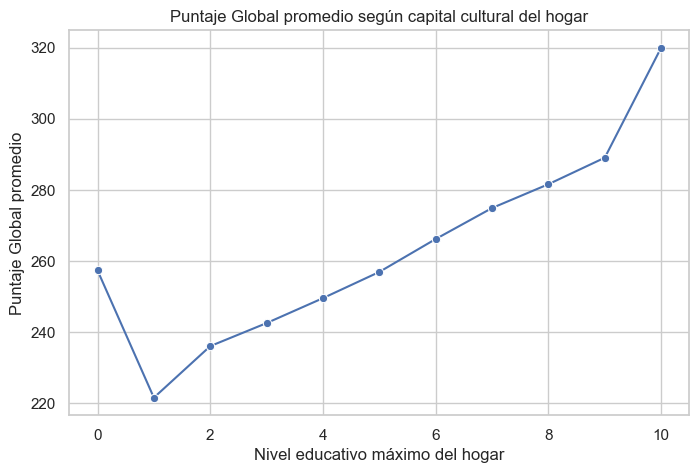

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular promedio por nivel educativo
promedios = df.groupby("EDU_MAX_HOGAR")["PUNT_GLOBAL"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(
    data=promedios,
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    marker="o"
)

plt.title("Puntaje Global promedio según capital cultural del hogar")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Puntaje Global promedio")
plt.show()

In [48]:
df["EDU_MAX_HOGAR"].value_counts().sort_index()

EDU_MAX_HOGAR
0      3160
1      2011
2     26431
3     35607
4     40580
5     83435
6      9078
7     27952
8      7873
9     39777
10    11570
Name: count, dtype: int64

In [49]:
resumen = df.groupby("EDU_MAX_HOGAR")["PUNT_GLOBAL"].agg(
    N="count",
    PROMEDIO="mean",
    MEDIANA="median",
    STD="std"
).reset_index()

resumen

,EDU_MAX_HOGAR,N,PROMEDIO,MEDIANA,STD
0,0,3160,257.380380,255.0,50.061029
1,1,2011,221.612631,217.0,38.642250
2,2,26431,236.093073,234.0,39.008267
3,3,35607,242.570702,240.0,39.191311
4,4,40580,249.578512,248.0,40.134676
5,5,83435,256.942422,256.0,41.712558
6,6,9078,266.188918,267.0,41.457413
7,7,27952,274.901009,276.0,41.773572
8,8,7873,281.592658,283.0,44.477695
9,9,39777,289.042361,291.0,47.219819


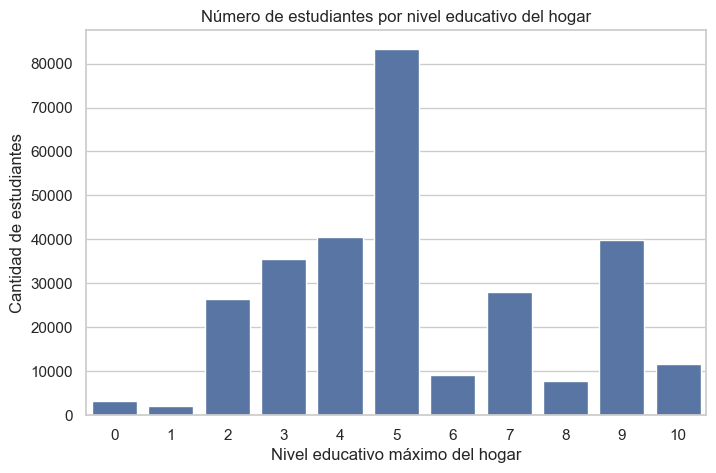

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

conteo = df["EDU_MAX_HOGAR"].value_counts().sort_index().reset_index()
conteo.columns = ["EDU_MAX_HOGAR", "N"]

plt.figure(figsize=(8,5))
sns.barplot(data=conteo, x="EDU_MAX_HOGAR", y="N")
plt.title("Número de estudiantes por nivel educativo del hogar")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Cantidad de estudiantes")
plt.show()

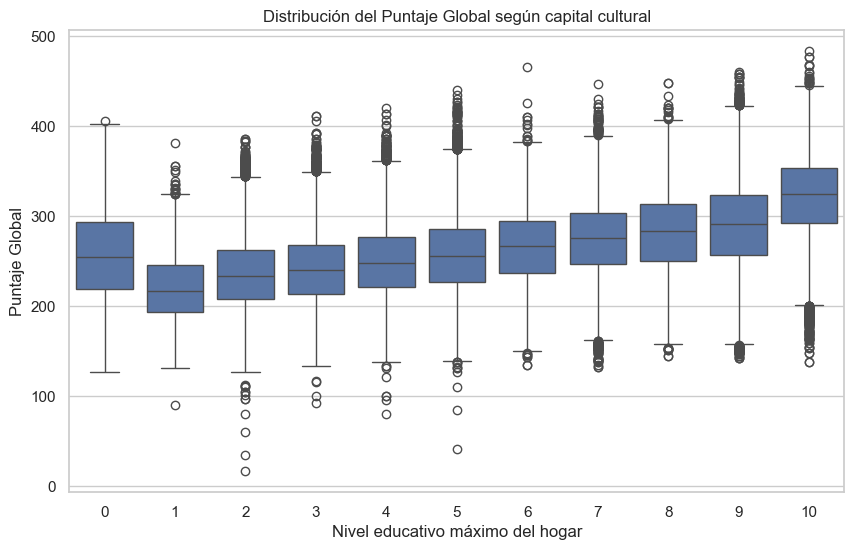

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x="EDU_MAX_HOGAR",
    y="PUNT_GLOBAL",
    data=df
)

plt.title("Distribución del Puntaje Global según capital cultural")
plt.xlabel("Nivel educativo máximo del hogar")
plt.ylabel("Puntaje Global")
plt.show()

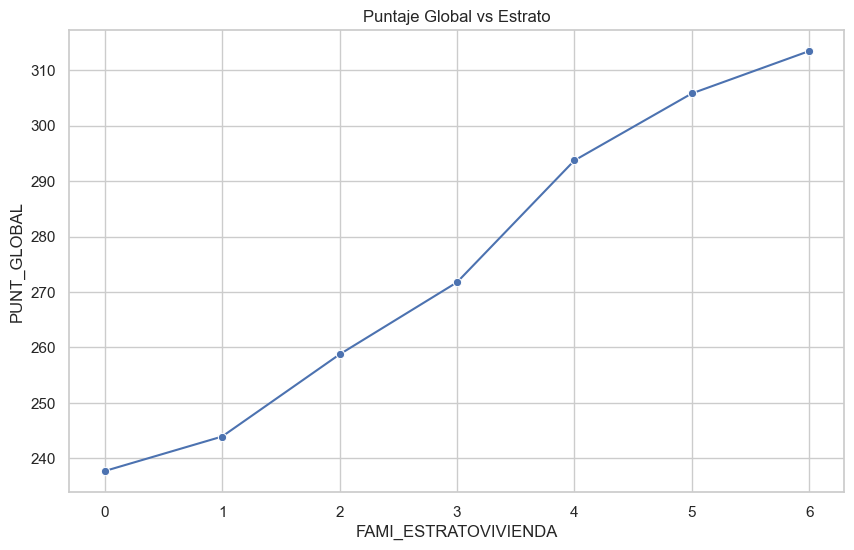

In [51]:
prom_estrato = df.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_GLOBAL"].mean().reset_index()

sns.lineplot(data=prom_estrato,
             x="FAMI_ESTRATOVIVIENDA",
             y="PUNT_GLOBAL",
             marker="o")

plt.title("Puntaje Global vs Estrato")
plt.show()

Para poder comparar, efectivamente las otras variables del capital social de los Estudiantes, vamos a crear un Indice que agrupe todas las demás variables, (que no sean Estrato)

Los datos no vienen como 0 o 1, entonces primero vamos a estandarizar, y después convertir en 0 1, para poder construir un indicador simple, que sume por cada aspecto que tenga el estudiante, es decir va de 0 a 4

In [55]:
binarias = [
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENELAVADORA"
]

for col in binarias:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()     # quitar espacios
        .str.upper()     # todo en mayúscula
    )

In [56]:
for col in binarias:
    df[col] = df[col].map({
        "SI": 1,
        "SÍ": 1,
        "NO": 0
    })

In [57]:
for col in binarias:
    print(col)
    print(df[col].value_counts(dropna=False))
    print("------")

FAMI_TIENEAUTOMOVIL
FAMI_TIENEAUTOMOVIL
0    195962
1     91512
Name: count, dtype: int64
------
FAMI_TIENECOMPUTADOR
FAMI_TIENECOMPUTADOR
1    196821
0     90653
Name: count, dtype: int64
------
FAMI_TIENEINTERNET
FAMI_TIENEINTERNET
1    189452
0     98022
Name: count, dtype: int64
------
FAMI_TIENELAVADORA
FAMI_TIENELAVADORA
1    224924
0     62550
Name: count, dtype: int64
------


In [54]:
df["INDICE_ECON"] = (
    df["FAMI_TIENEAUTOMOVIL"] +
    df["FAMI_TIENECOMPUTADOR"] +
    df["FAMI_TIENEINTERNET"] +
    df["FAMI_TIENELAVADORA"]
)
df

,PUNT_GLOBAL,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,DESEMP_INGLES,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,EDU_MAX_HOGAR,INDICE_ECON
0,196.0,26.0,43.0,42.0,45.0,42.0,A-,1.0,No,NO,NO,No,1,NoNONONo
1,258.0,60.0,50.0,54.0,46.0,40.0,A-,1.0,No,SI,SI,Si,4,NoSISISi
3,302.0,54.0,60.0,63.0,64.0,62.0,A2,2.0,No,SI,SI,Si,5,NoSISISi
4,241.0,45.0,52.0,48.0,46.0,54.0,A1,2.0,No,NO,SI,Si,7,NoNOSISi
5,200.0,44.0,48.0,31.0,36.0,44.0,A-,2.0,No,SI,SI,No,6,NoSISINo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470812,218.0,42.0,47.0,45.0,41.0,41.0,A-,1.0,No,SI,NO,Si,2,NoSINOSi
470813,325.0,77.0,58.0,61.0,66.0,59.0,A2,1.0,No,NO,NO,No,2,NoNONONo
470814,191.0,36.0,40.0,42.0,33.0,43.0,A-,2.0,No,SI,NO,Si,9,NoSINOSi
470815,220.0,50.0,57.0,35.0,37.0,34.0,A-,2.0,Si,SI,NO,Si,4,SiSINOSi
